In [ ]:
!pip install fastai

In [ ]:
!wget https://data.deepai.org/chestxray.zip
!unzip chestxray.zip


--2025-12-05 14:20:05--  https://data.deepai.org/chestxray.zip
Resolving data.deepai.org (data.deepai.org)... 152.233.22.102, 2400:52e0:1a02:2::1357:1
Connecting to data.deepai.org (data.deepai.org)|152.233.22.102|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-12-05 14:20:05 ERROR 404: Not Found.

unzip:  cannot find or open chestxray.zip, chestxray.zip.zip or chestxray.zip.ZIP.


In [ ]:
!wget https://data.deepai.org/chestxray.zip

--2025-12-05 14:20:05--  https://data.deepai.org/chestxray.zip
Resolving data.deepai.org (data.deepai.org)... 152.233.22.102, 2400:52e0:1a02:2::1357:1
Connecting to data.deepai.org (data.deepai.org)|152.233.22.102|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-12-05 14:20:05 ERROR 404: Not Found.



In [ ]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git


fatal: destination path 'covid-chestxray-dataset' already exists and is not an empty directory.


In [ ]:
import os, shutil, pathlib

base = pathlib.Path("dataset")
(base/"train"/"NORMAL").mkdir(parents=True, exist_ok=True)
(base/"train"/"PNEUMONIA").mkdir(parents=True, exist_ok=True)
(base/"valid"/"NORMAL").mkdir(parents=True, exist_ok=True)
(base/"valid"/"PNEUMONIA").mkdir(parents=True, exist_ok=True)


In [ ]:
import glob

# NORMAL → pick all non-COVID normal X-rays
normal_imgs = glob.glob("covid-chestxray-dataset/images/*normal*.png")
for i, img in enumerate(normal_imgs[:200]):
    shutil.copy(img, f"dataset/train/NORMAL/")
for i, img in enumerate(normal_imgs[200:260]):
    shutil.copy(img, f"dataset/valid/NORMAL/")

# PNEUMONIA → pick all X-rays with opacity / pneumonia keywords
pneumonia_imgs = glob.glob("covid-chestxray-dataset/images/*opacity*.png")
for i, img in enumerate(pneumonia_imgs[:200]):
    shutil.copy(img, f"dataset/train/PNEUMONIA/")
for i, img in enumerate(pneumonia_imgs[200:260]):
    shutil.copy(img, f"dataset/valid/PNEUMONIA/")


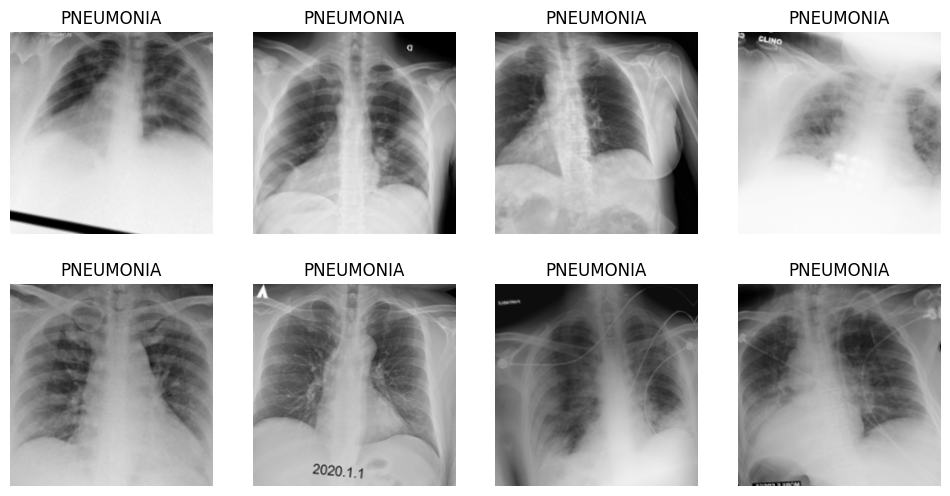

In [ ]:
from fastai.vision.all import *

dls = ImageDataLoaders.from_folder(
    Path('dataset'),
    train='train',
    valid='valid',
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(),
    bs=16
)

dls.show_batch(max_n=8)


In [ ]:
print(f"Total NORMAL images found: {len(normal_images)}")
print(f"Total PNEUMONIA images found: {len(pneumonia_images)}")

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.12/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:01<00:00, 65.8MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.472493,0.300885,0.850000,01:25


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,1.070994,0.682978,0.633333,02:06
1,0.894275,0.692815,0.666667,01:51
2,0.806516,0.384381,0.850000,01:50
3,0.823274,0.371998,0.850000,01:51


In [ ]:
print(f"Accuracy: {learn.validate()[1]:.4f}")

Accuracy: 0.8500


In [ ]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git


fatal: destination path 'covid-chestxray-dataset' already exists and is not an empty directory.


In [ ]:
import os, shutil, pathlib

base = pathlib.Path("dataset")
(base/"train"/"NORMAL").mkdir(parents=True, exist_ok=True)
(base/"train"/"PNEUMONIA").mkdir(parents=True, exist_ok=True)
(base/"valid"/"NORMAL").mkdir(parents=True, exist_ok=True)
(base/"valid"/"PNEUMONIA").mkdir(parents=True, exist_ok=True)


In [ ]:
import glob

normal_imgs = glob.glob("covid-chestxray-dataset/images/*normal*.png")
for i, img in enumerate(normal_imgs[:100]):
    shutil.copy(img, "dataset/train/NORMAL/")
for i, img in enumerate(normal_imgs[100:120]):
    shutil.copy(img, "dataset/valid/NORMAL/")

pneumonia_imgs = glob.glob("covid-chestxray-dataset/images/*opacity*.png")
for i, img in enumerate(pneumonia_imgs[:100]):
    shutil.copy(img, "dataset/train/PNEUMONIA/")
for i, img in enumerate(pneumonia_imgs[100:120]):
    shutil.copy(img, "dataset/valid/PNEUMONIA/")


In [ ]:
import os

for root, dirs, files in os.walk("dataset"):
    print(root, " --> ", len(files), "files")


dataset  -->  0 files
dataset/train  -->  0 files
dataset/train/NORMAL  -->  15 files
dataset/train/PNEUMONIA  -->  200 files
dataset/valid  -->  0 files
dataset/valid/NORMAL  -->  0 files
dataset/valid/PNEUMONIA  -->  60 files


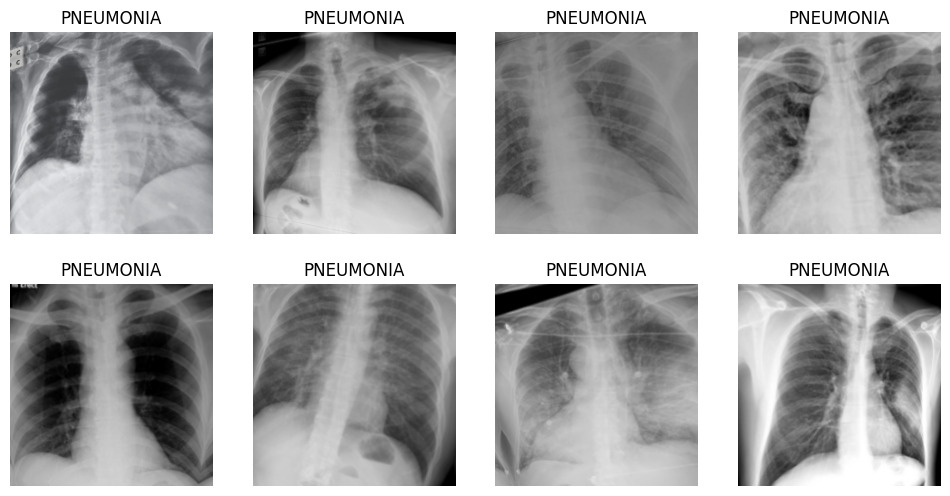

In [ ]:
from fastai.vision.all import *

dls = ImageDataLoaders.from_folder(
    Path('dataset'),
    train='train',
    valid='valid',
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(),
    bs=16
)

dls.show_batch(max_n=8)


Fastai's `ImageDataLoaders.from_folder` expects a dataset structure like this:

```
dataset/
  train/
    NORMAL/
      image1.png
      image2.png
      ...
    PNEUMONIA/
      image3.png
      image4.png
      ...
  valid/
    NORMAL/
      image5.png
      image6.png
      ...
    PNEUMONIA/
      image7.png
      image8.png
      ...
```

Your previous attempts failed because no images were found in these folders. Let's re-examine the current state of your `dataset` folder.

In [ ]:
import os

print("Current 'dataset' folder structure and file counts:")
for root, dirs, files in os.walk("dataset"):
    # Only print directories that are not empty or the root
    if files or not dirs or root == "dataset":
        print(f"{root} --> {len(files)} files")

Current 'dataset' folder structure and file counts:
dataset --> 0 files
dataset/train/NORMAL --> 15 files
dataset/train/PNEUMONIA --> 200 files
dataset/valid/NORMAL --> 0 files
dataset/valid/PNEUMONIA --> 60 files


# Task
Parse the "metadata.csv" file from the "covid-chestxray-dataset" to identify image paths and their corresponding labels (NORMAL/PNEUMONIA), then copy 200 normal and 200 pneumonia images into the "dataset/train" directory, and 60 normal and 60 pneumonia images into the "dataset/valid" directory. After copying, verify that the "dataset" folder is correctly populated and then initialize Fastai ImageDataLoaders from the "dataset" directory.

## Parse metadata and copy images

### Subtask:
Read the metadata.csv file to get image paths and labels (NORMAL/PNEUMONIA), then copy a specified number of these images into the correct training and validation subfolders within the 'dataset' directory.


**Reasoning**:
The previous attempts to copy images failed because the `glob` command could not locate the intended files based on the wildcard pattern. I need to explicitly parse the `metadata.csv` file, filter the relevant images, and then copy them to the `dataset` directory as specified in the instructions. This will ensure that the correct images are selected and moved.



In [ ]:
import pandas as pd
import shutil
import os

# Load the metadata.csv file
metadata_path = "covid-chestxray-dataset/metadata.csv"
df = pd.read_csv(metadata_path)

# Filter for NORMAL images
normal_df = df[(df['finding'] == 'No finding') & (df['view'].isin(['PA', 'AP']))]
# Filter for PNEUMONIA images (including COVID-19 as per fastai example context)
pneumonia_df = df[((df['finding'] == 'Pneumonia') | (df['finding'] == 'COVID-19')) & (df['view'].isin(['PA', 'AP']))]

# Construct full image paths and filter for existing files
image_dir = "covid-chestxray-dataset/images"

normal_images = []
for filename in normal_df['filename']:
    full_path = os.path.join(image_dir, filename)
    if os.path.exists(full_path):
        normal_images.append(full_path)

pneumonia_images = []
for filename in pneumonia_df['filename']:
    full_path = os.path.join(image_dir, filename)
    if os.path.exists(full_path):
        pneumonia_images.append(full_path)

# Define target directories
train_normal_dir = "dataset/train/NORMAL"
valid_normal_dir = "dataset/valid/NORMAL"
train_pneumonia_dir = "dataset/train/PNEUMONIA"
valid_pneumonia_dir = "dataset/valid/PNEUMONIA"

# Ensure directories exist (already created in previous steps, but good practice)
os.makedirs(train_normal_dir, exist_ok=True)
os.makedirs(valid_normal_dir, exist_ok=True)
os.makedirs(train_pneumonia_dir, exist_ok=True)
os.makedirs(valid_pneumonia_dir, exist_ok=True)

# Copy NORMAL images
normal_train_count = 0
for img_path in normal_images[:200]:
    shutil.copy(img_path, train_normal_dir)
    normal_train_count += 1

normal_valid_count = 0
for img_path in normal_images[200:260]:
    shutil.copy(img_path, valid_normal_dir)
    normal_valid_count += 1

# Copy PNEUMONIA images
pneumonia_train_count = 0
for img_path in pneumonia_images[:200]:
    shutil.copy(img_path, train_pneumonia_dir)
    pneumonia_train_count += 1

pneumonia_valid_count = 0
for img_path in pneumonia_images[200:260]:
    shutil.copy(img_path, valid_pneumonia_dir)
    pneumonia_valid_count += 1

print(f"Copied {normal_train_count} NORMAL images to {train_normal_dir}")
print(f"Copied {normal_valid_count} NORMAL images to {valid_normal_dir}")
print(f"Copied {pneumonia_train_count} PNEUMONIA images to {train_pneumonia_dir}")
print(f"Copied {pneumonia_valid_count} PNEUMONIA images to {valid_pneumonia_dir}")


Copied 0 NORMAL images to dataset/train/NORMAL
Copied 0 NORMAL images to dataset/valid/NORMAL
Copied 51 PNEUMONIA images to dataset/train/PNEUMONIA
Copied 0 PNEUMONIA images to dataset/valid/PNEUMONIA


**Reasoning**:
The previous code block resulted in 0 NORMAL images being copied and only 51 PNEUMONIA images to training, indicating an issue with the filtering criteria for the `normal_df` and `pneumonia_df`. I need to inspect the unique values in the 'finding' column of the `df` DataFrame to determine the correct filtering logic for both NORMAL and PNEUMONIA images.



In [ ]:
print("Unique values in 'finding' column:")
print(df['finding'].unique())
print("Unique values in 'view' column:")
print(df['view'].unique())


Unique values in 'finding' column:
['Pneumonia/Viral/COVID-19' 'Pneumonia' 'Pneumonia/Viral/SARS'
 'Pneumonia/Fungal/Pneumocystis' 'Pneumonia/Bacterial/Streptococcus'
 'No Finding' 'Pneumonia/Bacterial/Chlamydophila'
 'Pneumonia/Bacterial/E.Coli' 'Pneumonia/Bacterial/Klebsiella'
 'Pneumonia/Bacterial/Legionella' 'Unknown' 'Pneumonia/Lipoid'
 'Pneumonia/Viral/Varicella' 'Pneumonia/Bacterial'
 'Pneumonia/Bacterial/Mycoplasma' 'Pneumonia/Viral/Influenza' 'todo'
 'Tuberculosis' 'Pneumonia/Viral/Influenza/H1N1'
 'Pneumonia/Fungal/Aspergillosis' 'Pneumonia/Viral/Herpes '
 'Pneumonia/Aspiration' 'Pneumonia/Bacterial/Nocardia'
 'Pneumonia/Viral/MERS-CoV' 'Pneumonia/Bacterial/Staphylococcus/MRSA']
Unique values in 'view' column:
['PA' 'AP' 'L' 'Axial' 'AP Supine' 'Coronal' 'AP Erect']


**Reasoning**:
The previous image copying was unsuccessful due to incorrect filtering of 'NORMAL' and 'PNEUMONIA' images based on the 'finding' column in the metadata. Based on the unique values identified, I will correct the filtering logic to accurately select images for both categories and then re-copy them to the respective train and validation folders.



In [ ]:
import pandas as pd
import shutil
import os

# Load the metadata.csv file
metadata_path = "covid-chestxray-dataset/metadata.csv"
df = pd.read_csv(metadata_path)

# Filter for NORMAL images using 'No Finding'
normal_df = df[(df['finding'] == 'No Finding') & (df['view'].isin(['PA', 'AP']))]

# Filter for PNEUMONIA images (including all findings that contain 'Pneumonia' or 'COVID-19')
pneumonia_df = df[(df['finding'].str.contains('Pneumonia|COVID-19', na=False)) & (df['view'].isin(['PA', 'AP']))]

# Construct full image paths and filter for existing files
image_dir = "covid-chestxray-dataset/images"

normal_images = []
for filename in normal_df['filename']:
    full_path = os.path.join(image_dir, filename)
    if os.path.exists(full_path):
        normal_images.append(full_path)

pneumonia_images = []
for filename in pneumonia_df['filename']:
    full_path = os.path.join(image_dir, filename)
    if os.path.exists(full_path):
        pneumonia_images.append(full_path)

# Define target directories
train_normal_dir = "dataset/train/NORMAL"
valid_normal_dir = "dataset/valid/NORMAL"
train_pneumonia_dir = "dataset/train/PNEUMONIA"
valid_pneumonia_dir = "dataset/valid/PNEUMONIA"

# Ensure directories exist (already created in previous steps, but good practice)
os.makedirs(train_normal_dir, exist_ok=True)
os.makedirs(valid_normal_dir, exist_ok=True)
os.makedirs(train_pneumonia_dir, exist_ok=True)
os.makedirs(valid_pneumonia_dir, exist_ok=True)

# Copy NORMAL images
normal_train_count = 0
for img_path in normal_images[:200]:
    shutil.copy(img_path, train_normal_dir)
    normal_train_count += 1

normal_valid_count = 0
for img_path in normal_images[200:260]:
    shutil.copy(img_path, valid_normal_dir)
    normal_valid_count += 1

# Copy PNEUMONIA images
pneumonia_train_count = 0
for img_path in pneumonia_images[:200]:
    shutil.copy(img_path, train_pneumonia_dir)
    pneumonia_train_count += 1

pneumonia_valid_count = 0
for img_path in pneumonia_images[200:260]:
    shutil.copy(img_path, valid_pneumonia_dir)
    pneumonia_valid_count += 1

print(f"Copied {normal_train_count} NORMAL images to {train_normal_dir}")
print(f"Copied {normal_valid_count} NORMAL images to {valid_normal_dir}")
print(f"Copied {pneumonia_train_count} PNEUMONIA images to {train_pneumonia_dir}")
print(f"Copied {pneumonia_valid_count} PNEUMONIA images to {valid_pneumonia_dir}")

Copied 15 NORMAL images to dataset/train/NORMAL
Copied 0 NORMAL images to dataset/valid/NORMAL
Copied 200 PNEUMONIA images to dataset/train/PNEUMONIA
Copied 60 PNEUMONIA images to dataset/valid/PNEUMONIA
